In [65]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [30]:
FEG2012=pd.read_excel('data/2012FEGuide.xlsx')
FEG2012.columns = FEG2012.columns.str.replace(' ', '')
FEG2012.columns = FEG2012.columns.str.replace('?', '')
FEG2012.columns = FEG2012.columns.str.replace('#', 'num')
FEG2012.columns = FEG2012.columns.str.replace('%', 'percen')

In [84]:
#for x in FEG2012.columns:
#    print(f'{x}')

In [79]:
fecon=pd.DataFrame()


In [80]:
fecon=FEG2012[['MfrName','Carline','ModelYr','CityFE(Guide)-ConventionalFuel',\
'HwyFE(Guide)-ConventionalFuel','CombFE(Guide)-ConventionalFuel',\
'Guzzler','AnnualFuel1Cost-ConventionalFuel']]

In [88]:
print(fecon['MfrName'].unique())
print(len(fecon['MfrName'].unique()))

['aston martin' 'Audi' 'Bentley' 'BMW' 'Bugatti' 'General Motors'
 'Ferrari' 'Honda' 'Lamborghini' 'Toyota' 'MAZDA' 'McLaren Automotive '
 'Mercedes-Benz' 'Nissan' 'Porsche' 'Chrysler Group LLC' 'Jaguar Cars'
 'Lotus' 'Mitsubishi Motors NA' 'Ford Motor Company' 'Hyundai' 'Maserati'
 'Roush' 'Volkswagen' 'Volvo' 'Kia' 'Mitsubishi Motors Co' 'Rolls-Royce'
 'Saab Cars North America' 'Subaru' 'Suzuki' 'VPG' 'Land Rover']
33


In [82]:
#fecon['MakeModel']=fecon.apply(lambda row: row.MfrName+row.Carline, axis=1)
#df.apply(lambda row: row.a + row.b, axis=1)
fn = lambda row: row.MfrName + row.Carline # define a function for the new column
col = fecon.apply(fn, axis=1) # get column data with an index
fecon = fecon.assign(MakeModel=col.values) # assign values to column 'c'

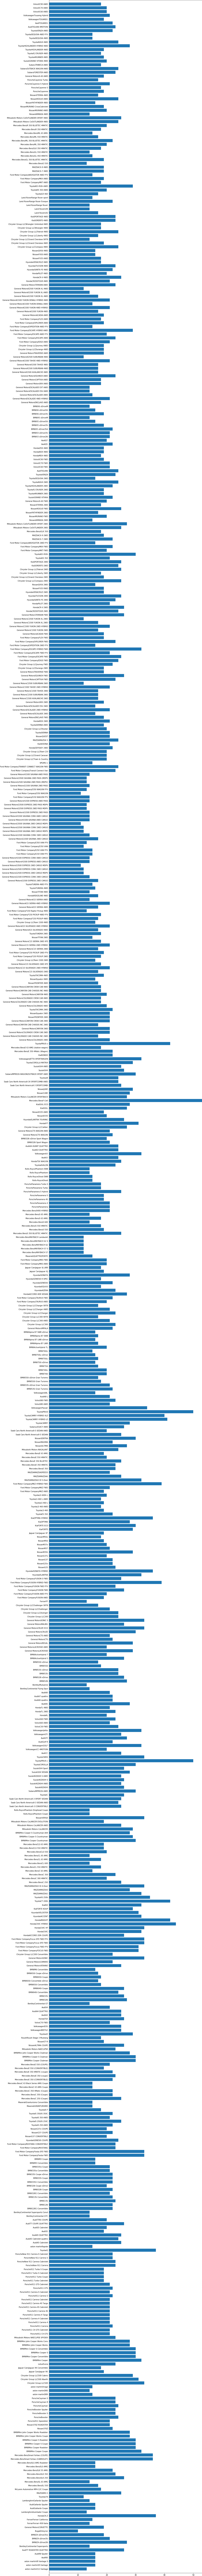

In [94]:
plt.subplots(figsize=(16,200))
plt.barh(fecon.MakeModel, fecon['CombFE(Guide)-ConventionalFuel'])
plt.margins(.001)
plt.tight_layout()
plt.show()

In [85]:
fecon

,MfrName,Carline,ModelYr,CityFE(Guide)-ConventionalFuel,HwyFE(Guide)-ConventionalFuel,CombFE(Guide)-ConventionalFuel,Guzzler,AnnualFuel1Cost-ConventionalFuel,MakeModel
0,aston martin,V12 Vantage,2012,11,17,13,G,4385,aston martinV12 Vantage
1,aston martin,V8 Vantage,2012,14,20,16,G,3563,aston martinV8 Vantage
2,aston martin,V8 Vantage,2012,14,21,16,G,3563,aston martinV8 Vantage
3,aston martin,V8 Vantage,2012,13,19,15,G,3800,aston martinV8 Vantage
4,aston martin,V8 Vantage S,2012,14,21,16,G,3563,aston martinV8 Vantage S
...,...,...,...,...,...,...,...,...,...
1137,Volvo,XC60 AWD,2012,18,24,20,NaN,2775,VolvoXC60 AWD
1138,Volvo,XC70 AWD,2012,17,23,20,NaN,2775,VolvoXC70 AWD
1139,Volvo,XC70 AWD,2012,18,24,20,NaN,2775,VolvoXC70 AWD
1140,Volvo,XC90 AWD,2012,16,23,18,NaN,3086,VolvoXC90 AWD


# Way Ahead. 
## Export fecon. Use it and the violations data to start getting actual plots.
### still need to try to find frequency analysis of cars on the road

In [97]:
fecon.to_csv('data/fecon.csv', index = False)

fecon is a csv file in the data folder with 1142 rows and 9 columns with information on the fuel efficency of 33 vehicle manufacturers 